#Tarea 2
#Ricardo Zamora Mennigke
#Metdoso Supervisados

Pregunta 1: [25 puntos] [no usar Python] Considere los datos de entrenamiento que se muestran en la siguiente Tabla para un problema de clasificaci´on binaria.

1. Calcule el ´ındice de Gini para la tabla completa, observe que el 50 % de las filas son de la clase C0 y el 50 % son de la clase C1.
2. Calcule el ´ındice de Gini Split para la variable G´enero.
3. Calcule el ´ındice de Gini Split para la variable Tipo-Carro.
4. Calcule el ´ındice de Gini Split para la variable Talla.
5. ¿Cu´al variable es mejor G´enero, Tipo-Carro o Talla?

###Revisar Excel adjunto

Pregunta 2: [25 puntos] En este ejercicio usaremos los datos (voces.csv). Se trata de un problema de reconocimiento de g´enero mediante el an´alisis de la voz y el habla. Esta base
de datos fue creada para identificar una voz como masculina o femenina, bas´andose en las propiedades ac´usticas de la voz y el habla. El conjunto de datos consta de 3.168 muestras de
voz grabadas, recogidas de hablantes masculinos y femeninos.
El conjunto de datos tiene las siguientes propiedades ac´usticas (variables) de cada voz:

1. Cargue la tabla de datos voces.csv en Python.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import graphviz # Debe instalar este paquete 
import pandas as pd
import matplotlib.image as mpimg
from matplotlib import colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from pandas import DataFrame

C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/Documents/Machine Learning/Métodos Supervisados con Python/Clase 01")
print(os.getcwd())
datos = pd.read_csv('voces.csv',delimiter=',',decimal=".")
print(datos.shape)

C:\Users\rzamoram\Documents\Machine Learning\Métodos Supervisados con Python\Clase 01
(3168, 21)


In [4]:
print(datos.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx     genero  
0  0.275862  0.007812  0.0078

In [5]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  genero    3168 non-null   obje

In [6]:
datos.describe(include = np.number)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
def distribucion_variable_predecir(data:DataFrame,variable_predict:str):
    colors = list(dict(**mcolors.CSS4_COLORS))
    df = pd.crosstab(index=data[variable_predict],columns="valor") / data[variable_predict].count()
    fig = plt.figure(figsize=(10,9))
    g = fig.add_subplot(111)
    countv = 0
    titulo = "Distribución de la variable %s" % variable_predict
    for i in range(df.shape[0]):
        g.barh(1,df.iloc[i],left = countv, align='center',color=colors[11+i],label= df.iloc[i].name)
        countv = countv + df.iloc[i]
    vals = g.get_xticks()
    g.set_xlim(0,1)
    g.set_yticklabels("")
    g.set_title(titulo)
    g.set_ylabel(variable_predict)
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    countv = 0 
    for v in df.iloc[:,0]:
        g.text(np.mean([countv,countv+v]) - 0.03, 1 , '{:.1%}'.format(v), color='black', fontweight='bold')
        countv = countv + v
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)

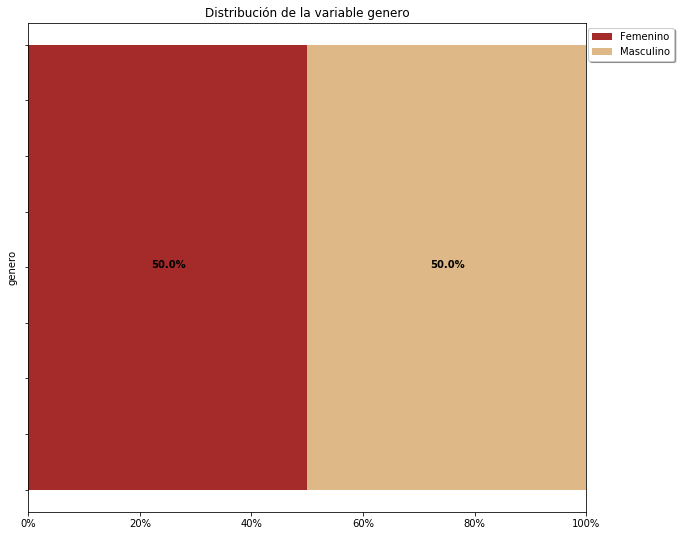

In [8]:
distribucion_variable_predecir(datos,"genero")

2. Use Arboles de Decisi´on en ´ Python (con los par´ametros por defecto) para generar un modelo predictivo para la tabla voces.csv usando el 80 % de los datos para la tabla aprendizaje y un 20 % para la tabla testing, luego calcule para los datos de testing la matriz de confusi´on, la precisi´on global y la precisi´on para cada una de las dos categor´ıas. ¿Son buenos los resultados? Explique.

In [9]:
X = datos.iloc[:,:20] 
print(X.head())
y = datos.iloc[:,20:21] 
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.27586

In [10]:
instancia_arbol = DecisionTreeClassifier(random_state=0)

instancia_arbol.fit(X_train,y_train)

print("Las predicciones en Testing son: {}".format(instancia_arbol.predict(X_test)))

Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculi

In [11]:
prediccion = instancia_arbol.predict(X_test)
MC = confusion_matrix(y_test, prediccion)

In [12]:
def indices_general_reducido(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por categoría":precision_categoria}

In [13]:
indices = indices_general_reducido(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[288  13]
 [ 12 321]]

Precisión Global:
0.9605678233438486

Error Global:
0.039432176656151396

Precisión por categoría:
   Femenino  Masculino
0  0.956811   0.963964


Con una precision global de 0.9605678233438486, la precision es bastante alta con menos de un 0,05 de error. Eso si visualmente, se denota que el modelo presenta muchos datos confundidos, pero aun asi se denota que la precision por categoria tanto para femenino como masculino es bastante alta. El modelo en terminos generales funciona bien con los datos. 

3. Usando la funci´on programada en el ejercicio 1 de la tarea anterior, los datos voces.csv y los modelos generados arriba construya un DataFrame de manera que en cada una de las filas aparezca un modelo predictivo y en las columnas aparezcan los ´ındices Precisi´on Global, Error Global Precisi´on Positiva (PP), Precisi´on Negativa (PN), Falsos Positivos (FP), los Falsos Negativos (FN), la Asertividad Positiva (AP) y la Asertividad Negativa (AN). ¿Cu´al de los modelos es mejor para estos datos?

In [14]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    precision_positiva = MC[1][1]/(MC[1][1] + MC[1][0])
    precision_negativa = MC[0][0]/(MC[0][0] + MC[0][1])
    falsos_positivos = 1 - precision_negativa
    falsos_negativos = 1 - precision_positiva
    asertividad_positiva = MC[1][1]/(MC[0][1] + MC[1][1])
    asertividad_negativa = MC[0][0]/(MC[0][0] + MC[1][0])
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por categoría":precision_categoria,
            "Precision Positiva (PP)": precision_positiva, 
            "Precision Negativa (PN)":precision_negativa, 
            "Falsos Positivos(FP)": falsos_positivos,
            "Falsos Negativos (FN)": falsos_negativos,
            "Asertividad Positiva (AP)": asertividad_positiva,
            "Asertividad Negativa (NP)": asertividad_negativa}
    
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[288  13]
 [ 12 321]]

Precisión Global:
0.9605678233438486

Error Global:
0.039432176656151396

Precisión por categoría:
   Femenino  Masculino
0  0.956811   0.963964

Precision Positiva (PP):
0.963963963963964

Precision Negativa (PN):
0.9568106312292359

Falsos Positivos(FP):
0.04318936877076407

Falsos Negativos (FN):
0.036036036036036

Asertividad Positiva (AP):
0.9610778443113772

Asertividad Negativa (NP):
0.96


In [15]:
A = np.matrix([[0.7413249211356467, 0.25867507886435326, 0.7717717717717718, 0.707641196013289, 0.292358803986711, 0.2282282282282282, 0.744927536231884, 0.7370242214532872],
               [0.9794952681388013, 0.02050473186119872, 0.975975975975976, 0.9833887043189369, 0.01661129568106312, 0.024024024024024038, 0.9848484848484849, 0.9736842105263158],
              [0.9605678233438486, 0.039432176656151396, 0.963963963963964, 0.9568106312292359, 0.04318936877076407, 0.036036036036036, 0.9610778443113772, 0.96]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos todas variables","K-vecinos 6 variables","Arbol de Decision (default)"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df

,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos todas variables,0.741325,0.258675,0.771772,0.707641,0.292359,0.228228,0.744928,0.737024
K-vecinos 6 variables,0.979495,0.020505,0.975976,0.983389,0.016611,0.024024,0.984848,0.973684
Arbol de Decision (default),0.960568,0.039432,0.963964,0.956811,0.043189,0.036036,0.961078,0.960000


Para estos datos se denota aun que el metodo de Arbol de decision se muestra preciso, como se denota, el modelo de 6 variables k vecinos resulta mejor. Su precision global es mas alta, es decir, logra identificar mejor los casos la PP y PN confirman esto, ademas los datos confundidas FP y FN son menores.

4. Grafique el ´arbol generado e interprete al menos dos reglas que se puedan extraer del mismo. Si es necesario pode el ´arbol para que las reglas sean legibles.

In [16]:
def graficar_arbol(grafico = None):
    grafico.format = "png"
    archivo  = grafico.render()
    img = mpimg.imread(archivo)
    imgplot = plt.imshow(img)
    plt.axis('off')

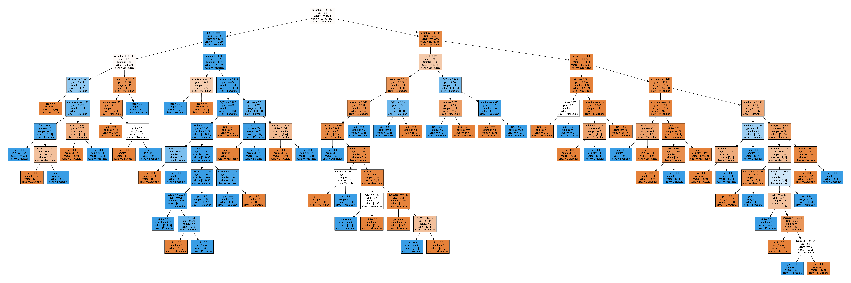

In [17]:
datos_plotear = export_graphviz(instancia_arbol, out_file=None,class_names=["Masculino", "Femanino"],
                feature_names=list(X.columns.values), filled=True)
grafico = graphviz.Source(datos_plotear) 
plt.rcParams['figure.figsize'] = [15, 15] # Tamaño del gráfico
graficar_arbol(grafico)  

In [18]:
##Podar
instancia_arbol2 = DecisionTreeClassifier(min_samples_leaf=150)
instancia_arbol2.fit(X_train,y_train)
prediccion = instancia_arbol2.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[283  18]
 [ 17 316]]

Precisión Global:
0.944794952681388

Error Global:
0.05520504731861198

Precisión por categoría:
   Femenino  Masculino
0  0.940199   0.948949

Precision Positiva (PP):
0.948948948948949

Precision Negativa (PN):
0.9401993355481728

Falsos Positivos(FP):
0.05980066445182719

Falsos Negativos (FN):
0.05105105105105101

Asertividad Positiva (AP):
0.9461077844311377

Asertividad Negativa (NP):
0.9433333333333334


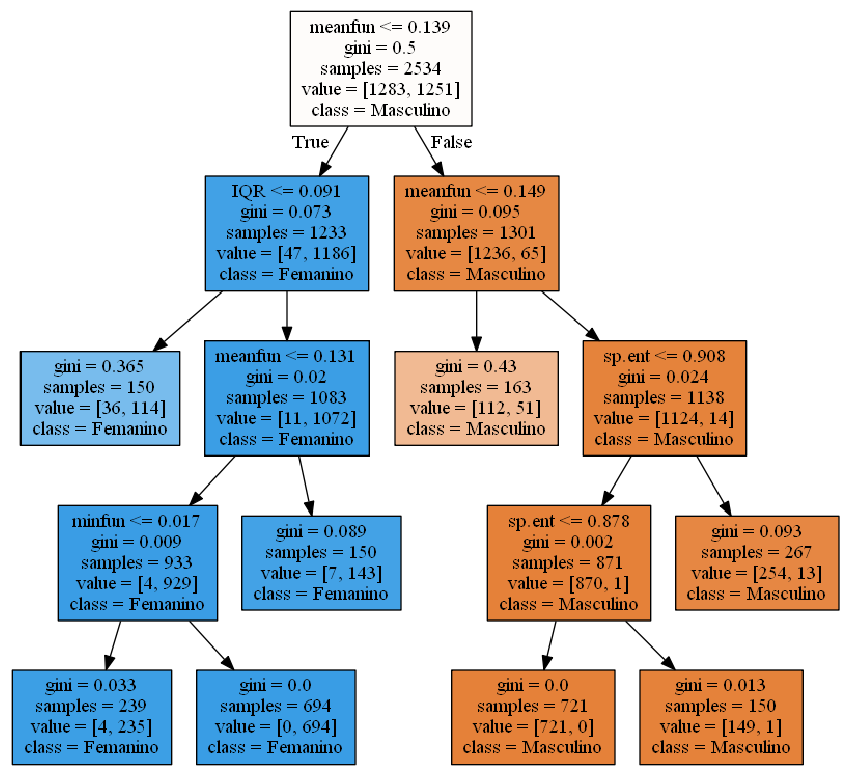

In [19]:
datos_plotear = export_graphviz(instancia_arbol2, out_file=None,class_names=["Masculino", "Femanino"],
                feature_names=list(X.columns.values), filled=True)
grafico = graphviz.Source(datos_plotear) 
plt.rcParams['figure.figsize'] = [15, 15] # Tamaño del gráfico
graficar_arbol(grafico)

El arbol de decision inicial resulta muy grande, y de hecho, por tal motivo, dificil de interpretar. Por tal motivo se procede a podarlo y reducirlo. Leyendo el arbol de decision anterior, se denota lo siguiente. El modelo identifica inicialmente la variable meanfun, cuando esta es menor o igual de 0,139, se mantiene un coeficiente de gini de 0,5 es decir medio, el cuadro inicial identifica 2534 muestras para este caso donde 1283 parecen ser atribuibles a masculino y 1251 a femenino. Volviendo al tema cuando meanfun es menor o igual de 0,139, entonces "True", indica que nos movemos al cuadro de abajo azul representado principalmente por voces femeninas. Donde la muestra que recibe e identifica es de 1233, que se va a dividir segun el criterio de un IQR menor o igual de 0,091, es decir se divide a las feminas segun este rango intercuartil, 47 cumplen con este criterio vs 1186 que no lo hacen. Esto indica que existen no tantos datos confundidos, de hecho, el gini es de casi 0 con un 0,073. Si pasamos de cuadro a la seccion anaranjada en el mismo nivel tenemos casos identificados como masculinos con un sample de 1301 casos. Ahora para bajar al siguiente nivel meanfun se muestra como variable identifacdora donde los casos True son menores o iguales a 0,149 y los Falsos por encima. los menores, es decir, true son 1236 casos contra 65 false. El gini es nuevamente bajo con 0,095 lo que indica pocos datos confundidos, aunque aun se puede bajar a cero.

5. Repita los ejercicios 1-4, pero esta vez use 2 combinaciones diferentes de los par´ametros del m´etodo DecisionTreeClassifier. ¿Mejora la predicci´on?.

In [20]:
##max depth = 2 y criteration=entropy
instancia_arbol = DecisionTreeClassifier(criterion='entropy',max_depth=2)
instancia_arbol.fit(X_train,y_train)
print("Las predicciones en Testing son: {}".format(instancia_arbol.predict(X_test)))

Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'

In [21]:
prediccion = instancia_arbol.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[283  18]
 [ 17 316]]

Precisión Global:
0.944794952681388

Error Global:
0.05520504731861198

Precisión por categoría:
   Femenino  Masculino
0  0.940199   0.948949

Precision Positiva (PP):
0.948948948948949

Precision Negativa (PN):
0.9401993355481728

Falsos Positivos(FP):
0.05980066445182719

Falsos Negativos (FN):
0.05105105105105101

Asertividad Positiva (AP):
0.9461077844311377

Asertividad Negativa (NP):
0.9433333333333334


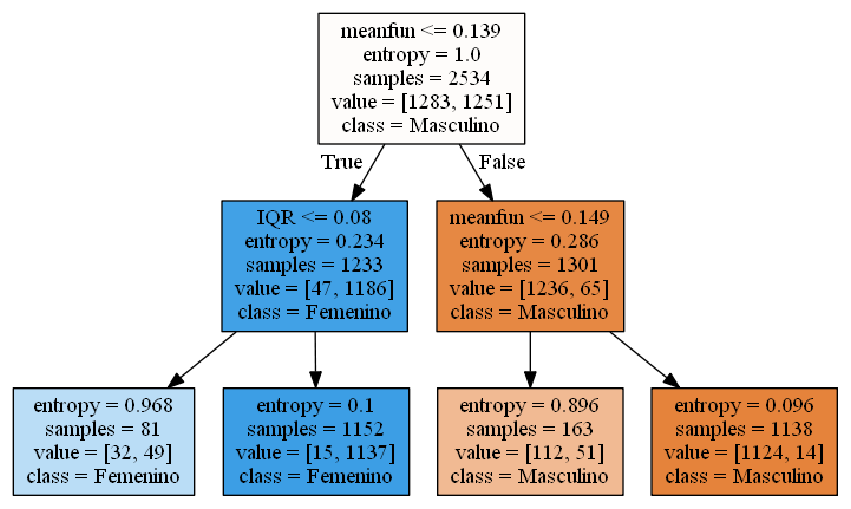

In [22]:
datos_plotear = export_graphviz(instancia_arbol, out_file=None,class_names=["Masculino", "Femenino"],
                feature_names=list(X.columns.values), filled=True)
grafico = graphviz.Source(datos_plotear) 
plt.rcParams['figure.figsize'] = [15, 15] # Tamaño del gráfico
graficar_arbol(grafico) 

Aqui resulta importante notar que se limito el arbol de decision inicial con parametros distintos, en este caso, criterion='entropy' y max_depth=2, en general estos generan algoritmos distintos de estimacion pero la diferencia no debe ser mucho mayor al caso anterior. De hecho, la precision global dio similar al arbol podado 0.944794952681388. Los resultados de este arbol de decision con parametros nuevos son buenos, aunque ligeramente menos precisos que el arbol inicial. No se necesita podarlo porque se establecio un depth maximo de 2. Leyendo el arbol de decision anterior, los criterios son los mismos pero con ligeras variaciones en las estimaciones. En vez de gini ahora tenemos entropy. El modelo identifica inicialmente la variable meanfun, cuando esta es menor o igual de 0,139, se mantiene un coeficiente de entropy de 1,0 es decir medio para ambas categorias, el cuadro inicial identifica 2534 muestras para este caso donde 1283 parecen ser atribuibles a masculino y 1251 a femenino. Volviendo al tema cuando meanfun es menor o igual de 0,139, entonces "True", indica que nos movemos al cuadro de abajo azul representado principalmente por voces femeninas. Donde la muestra que recibe e identifica es de 1233, que se va a dividir segun el criterio de un IQR menor o igual de 0,08, es decir se divide a las feminas segun este rango intercuartil, 47 cumplen con este criterio vs 1186 que no lo hacen. Esto indica que existen no tantos datos confundidos, de hecho, el entropy es de 0,234. Si pasamos de cuadro a la seccion anaranjada en el mismo nivel tenemos casos identificados como masculinos con un sample de 1301 casos. Ahora para bajar al siguiente nivel meanfun se muestra como variable identifacdora donde los casos True son menores o iguales a 0,149 y los Falsos por encima. los menores, es decir, true son 1236 casos contra 65 false. El entropy es nuevamente bajo con 0,286 lo que indica pocos datos confundidos, aunque aun se puede bajar a cero.

In [23]:
##max depth = 2 y criteration=entropy y splitter=random
instancia_arbol = DecisionTreeClassifier(criterion='gini', splitter="random", max_depth=3)
instancia_arbol.fit(X_train,y_train)
print("Las predicciones en Testing son: {}".format(instancia_arbol.predict(X_test)))

Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Mascul

In [24]:
prediccion = instancia_arbol.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[254  47]
 [ 16 317]]

Precisión Global:
0.9006309148264984

Error Global:
0.09936908517350163

Precisión por categoría:
   Femenino  Masculino
0  0.843854   0.951952

Precision Positiva (PP):
0.9519519519519519

Precision Negativa (PN):
0.8438538205980066

Falsos Positivos(FP):
0.15614617940199338

Falsos Negativos (FN):
0.048048048048048075

Asertividad Positiva (AP):
0.8708791208791209

Asertividad Negativa (NP):
0.9407407407407408


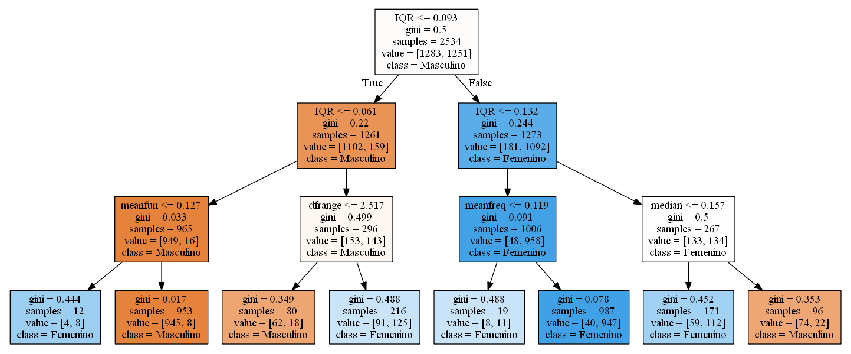

In [25]:
datos_plotear = export_graphviz(instancia_arbol, out_file=None,class_names=["Masculino", "Femenino"],
                feature_names=list(X.columns.values), filled=True)
grafico = graphviz.Source(datos_plotear) 
plt.rcParams['figure.figsize'] = [15, 15] # Tamaño del gráfico
graficar_arbol(grafico) 

Aqui se denota la mayor diferencia resulta importante, en este caso, criterion='gini' y max_depth=3, pero se incluye un splitter random que bajo significativamente la precision. De hecho, la precision global puede decirse que ya muestra un resultado significativamente inferior con 0.9006309148264984. Los resultados de este arbol de decision con parametros nuevos aun se puede decir que son buenos y aun altos, aunque menos precisos que el arbol inicial. No se necesita podarlo porque se establecio un depth maximo de 3. El modelo identifica inicialmente la variable IQR, cuando esta es menor o igual de 0,093, se mantiene un coeficiente de gini en 0,5, es decir, medio para ambas categorias, el cuadro inicial identifica 2534 muestras para este caso donde 1283 parecen ser atribuibles a masculino y 1251 a femenino. Volviendo al tema cuando IQR es menor o igual de 0,093, entonces "True", indica que nos movemos al cuadro de abajo anaranjado representado principalmente por voces masculinas. Donde la muestra que recibe e identifica es de 1261, que se va a dividir segun el criterio de un IQR menor o igual de 0,061, es decir se segun este rango intercuartil, 1102 cumplen con este criterio vs 159 que no lo hacen. Esto indica que existen no tantos datos confundidos, de hecho, el gini es de 0,22. Si pasamos de cuadro a la seccion azul en el mismo nivel tenemos casos identificados como femeninos con un sample de 1273 casos. Ahora para bajar al siguiente nivel IQR se muestra como variable identifacdora donde los casos True son menores o iguales a 0,132 y los Falsos por encima. los menores, es decir, true son 181 casos contra 1092 false. El gini es nuevamente bajo con 0,244 lo que indica pocos datos confundidos, aunque aun se puede bajar a cero.

In [26]:
A = np.matrix([[0.7413249211356467, 0.25867507886435326, 0.7717717717717718, 0.707641196013289, 0.292358803986711, 0.2282282282282282, 0.744927536231884, 0.7370242214532872],
               [0.9794952681388013, 0.02050473186119872, 0.975975975975976, 0.9833887043189369, 0.01661129568106312, 0.024024024024024038, 0.9848484848484849, 0.9736842105263158],
              [0.9605678233438486, 0.039432176656151396, 0.963963963963964, 0.9568106312292359, 0.04318936877076407, 0.036036036036036, 0.9610778443113772, 0.96],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.9006309148264984, 0.09936908517350163, 0.9519519519519519, 0.8438538205980066, 0.15614617940199338, 0.048048048048048075, 0.8708791208791209, 0.9407407407407408]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos todas variables","K-vecinos 6 variables","Arbol de Decision (default)","Arbol de Decision (criterion='entropy',max_depth=2)","Arbol de Decision (criterion='gini', splitter='random', max_depth=3)"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df


,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos todas variables,0.741325,0.258675,0.771772,0.707641,0.292359,0.228228,0.744928,0.737024
K-vecinos 6 variables,0.979495,0.020505,0.975976,0.983389,0.016611,0.024024,0.984848,0.973684
Arbol de Decision (default),0.960568,0.039432,0.963964,0.956811,0.043189,0.036036,0.961078,0.960000
"Arbol de Decision (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision (criterion='gini', splitter='random', max_depth=3)",0.900631,0.099369,0.951952,0.843854,0.156146,0.048048,0.870879,0.940741


Para estos datos se denota aun que todos los metodos de Arbol de decision se muestran precisos, especialmente el caso default, pero como se denota, el modelo de 6 variables k vecinos resulta mejor. Su precision global es mas alta, es decir, logra identificar mejor los casos la PP y PN confirman esto, ademas los datos confundidas FP y FN son menores.

6. Repita los ejercicios 1-4, pero esta vez use 2 combinaciones diferentes de selecci´on de 6 variables predictoras. ¿Mejora la predicci´on?.

In [27]:
def poder_predictivo_categorica(data:DataFrame, var:str, variable_predict:str):
    df = pd.crosstab(index= data[var],columns=data[variable_predict])
    df = df.div(df.sum(axis=1),axis=0)
    titulo = "Distribución de la variable %s según la variable %s" % (var,variable_predict)
    g = df.plot(kind='barh',stacked=True,legend = True, figsize = (10,9), \
                xlim = (0,1),title = titulo, width = 0.8)
    vals = g.get_xticks()
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)
    for bars in g.containers:
        plt.setp(bars, width=.9)
    for i in range(df.shape[0]):
        countv = 0 
        for v in df.iloc[i]:
            g.text(np.mean([countv,countv+v]) - 0.03, i , '{:.1%}'.format(v), color='black', fontweight='bold')
            countv = countv + v
            
def poder_predictivo_numerica(data:DataFrame, var:str, variable_predict:str):
    sns.FacetGrid(data, hue=variable_predict, height=6).map(sns.kdeplot, var, shade=True).add_legend()

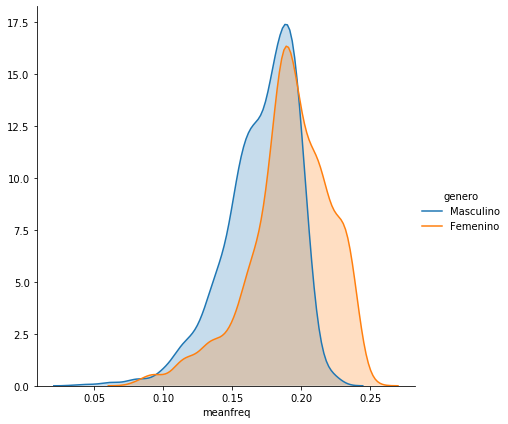

In [28]:
poder_predictivo_numerica(datos,"meanfreq","genero")

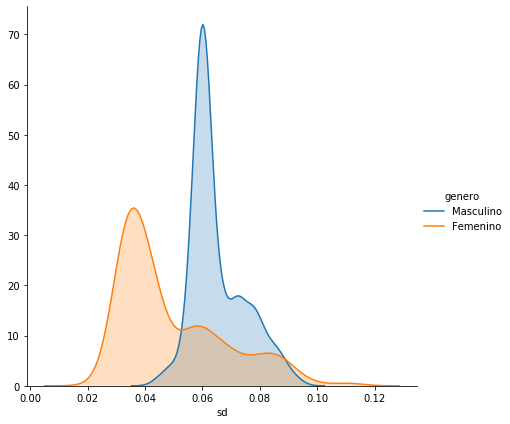

In [29]:
poder_predictivo_numerica(datos,"sd","genero")

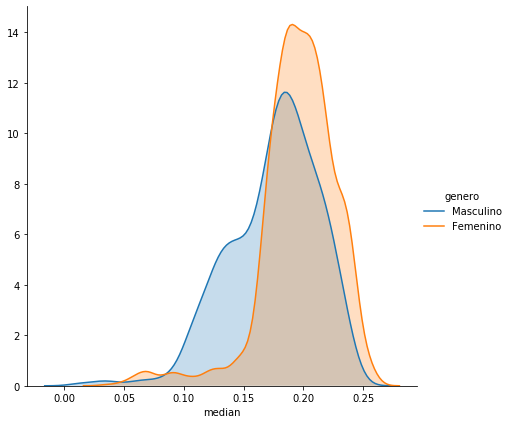

In [30]:
poder_predictivo_numerica(datos,"median","genero")

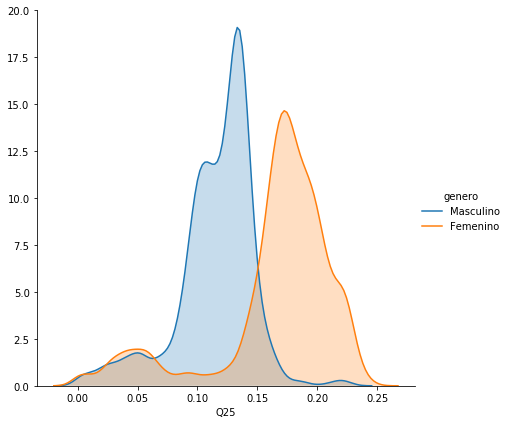

In [31]:
poder_predictivo_numerica(datos,"Q25","genero")

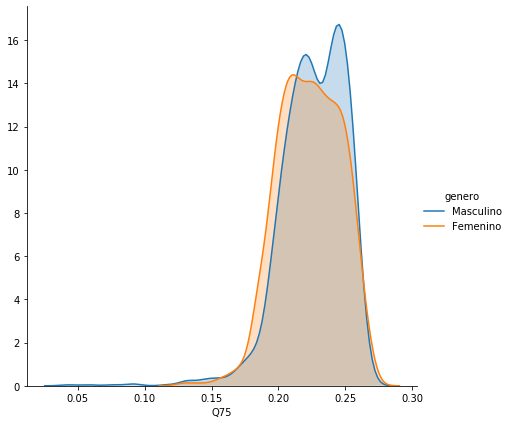

In [32]:
poder_predictivo_numerica(datos,"Q75","genero")

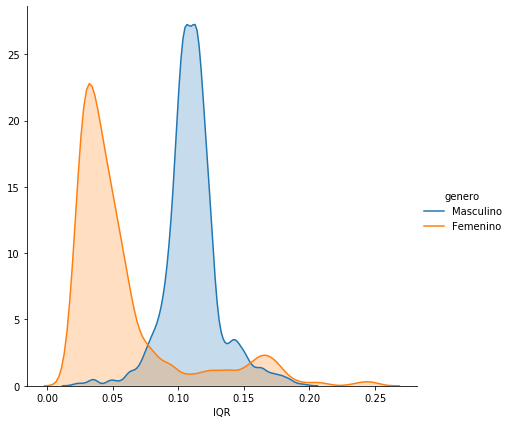

In [33]:
poder_predictivo_numerica(datos,"IQR","genero")

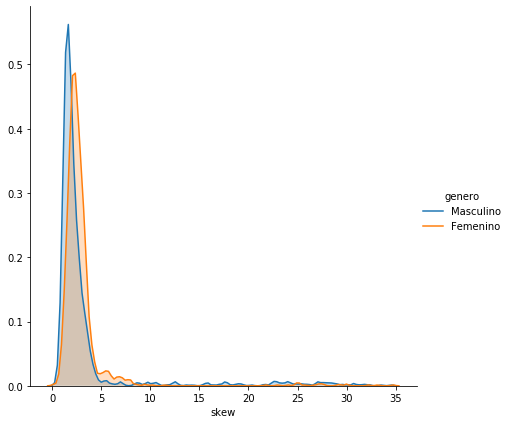

In [34]:
poder_predictivo_numerica(datos,"skew","genero")

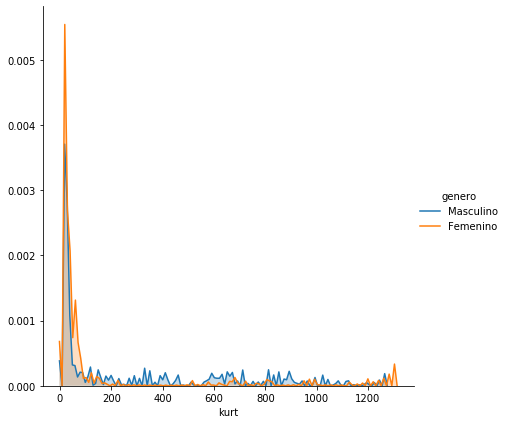

In [35]:
poder_predictivo_numerica(datos,"kurt","genero")

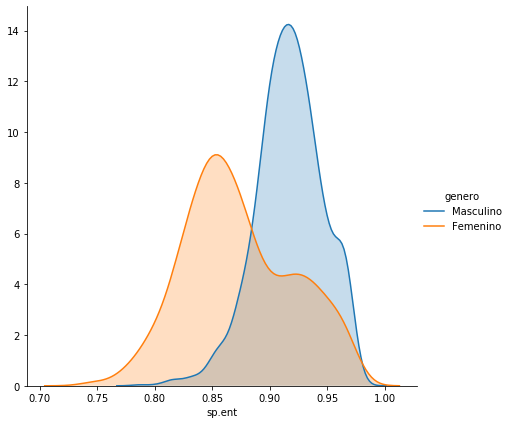

In [36]:
poder_predictivo_numerica(datos,"sp.ent","genero")

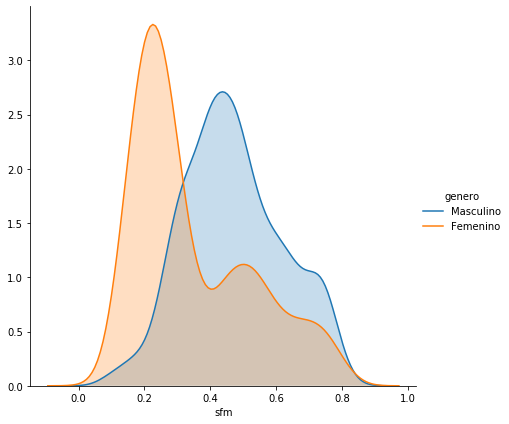

In [37]:
poder_predictivo_numerica(datos,"sfm","genero")

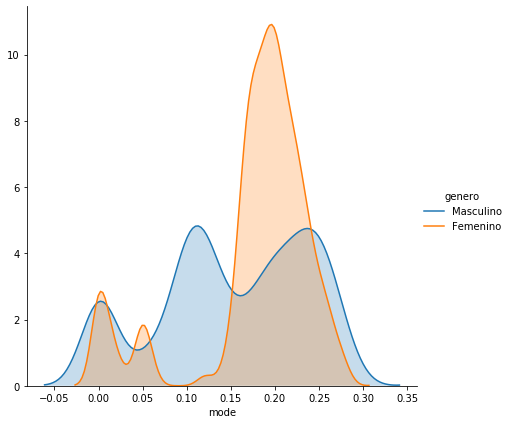

In [38]:
poder_predictivo_numerica(datos,"mode","genero")

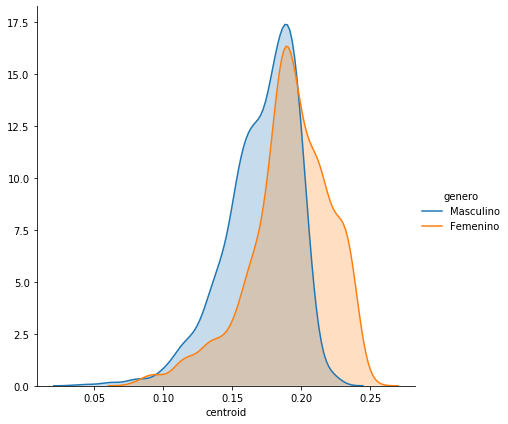

In [39]:
poder_predictivo_numerica(datos,"centroid","genero")

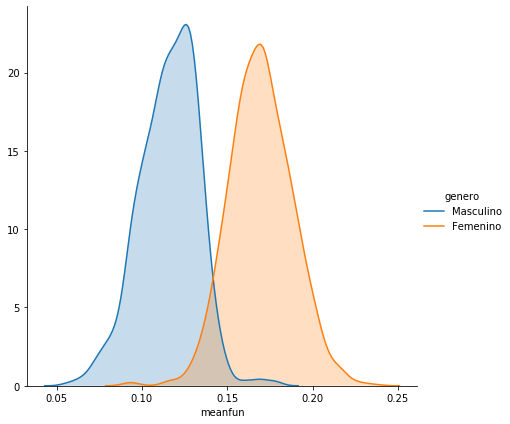

In [40]:
poder_predictivo_numerica(datos,"meanfun","genero")

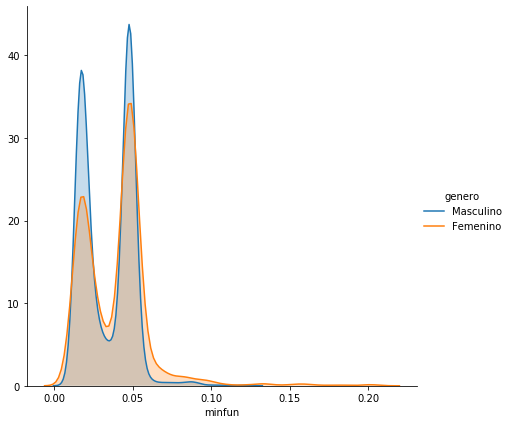

In [41]:
poder_predictivo_numerica(datos,"minfun","genero")

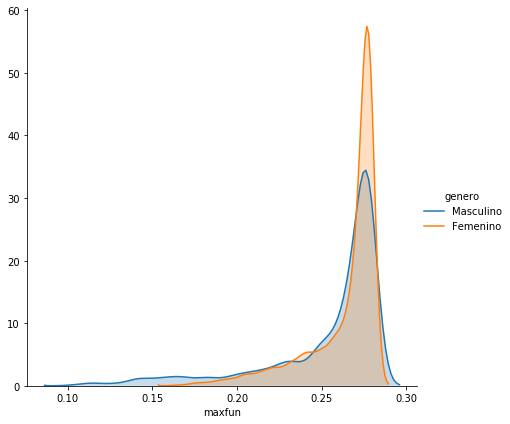

In [42]:
poder_predictivo_numerica(datos,"maxfun","genero")

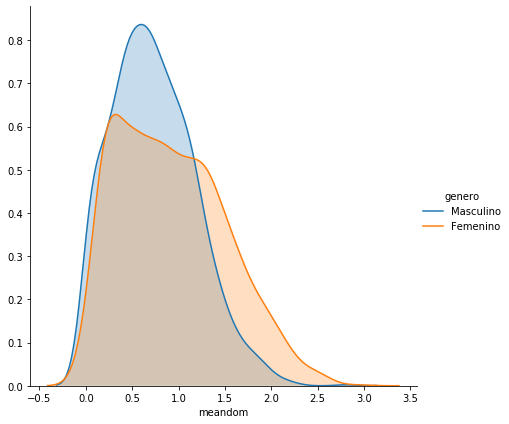

In [43]:
poder_predictivo_numerica(datos,"meandom","genero")

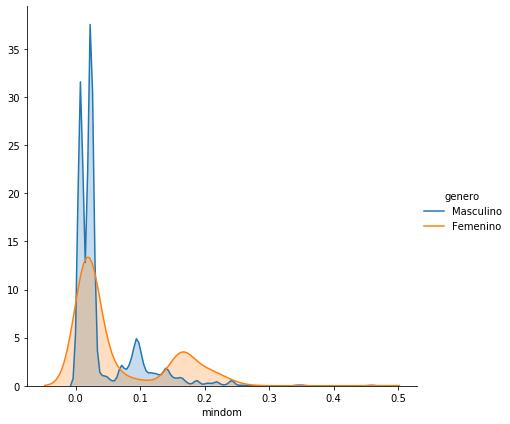

In [44]:
poder_predictivo_numerica(datos,"mindom","genero")

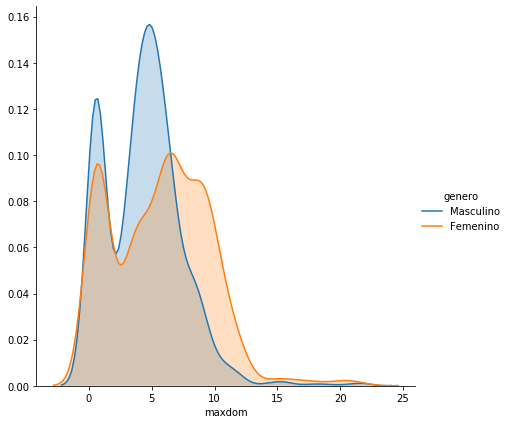

In [45]:
poder_predictivo_numerica(datos,"maxdom","genero")

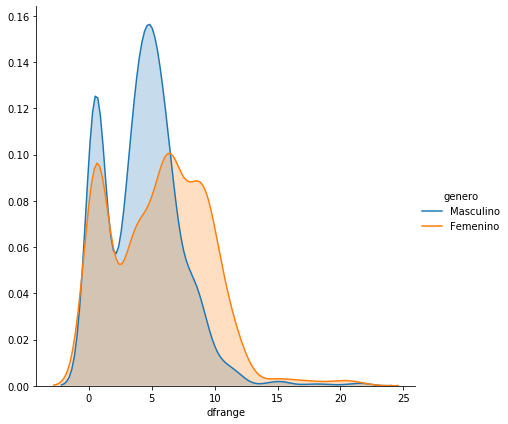

In [46]:
poder_predictivo_numerica(datos,"dfrange","genero")

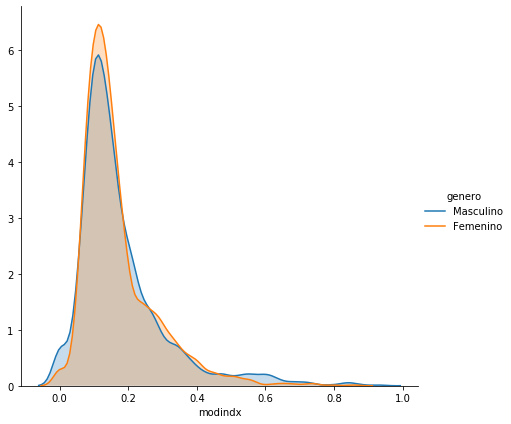

In [47]:
poder_predictivo_numerica(datos,"modindx","genero")

Se denota que pueden haber variables correlacionadas y que por ende podrian eliminarse del modelo, posteriormente el valor predictivo refleja que existen muchas variables sin poder predictivo significativo visualmente denotado sobre la variable genero. Se denota significativo valor predictivo en las variables sd, Q25, IQR, sp.ent, sfm, y meanfun, tambien un poco en skew. Las variables presentan diferencias en sus escalas numericas importantes, aunque para efectos de la estimacion es probable que no afecten.

In [48]:
#Modelo default con arboles solo 6 variables
X = datos.iloc[:,[1,3,5,8,9,12]] 
print(X.head())
y = datos.iloc[:,20:21]
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

         sd       Q25       IQR    sp.ent       sfm   meanfun
0  0.064241  0.015071  0.075122  0.893369  0.491918  0.084279
1  0.067310  0.019414  0.073252  0.892193  0.513724  0.107937
2  0.083829  0.008701  0.123207  0.846389  0.478905  0.098706
3  0.072111  0.096582  0.111374  0.963322  0.727232  0.088965
4  0.079146  0.078720  0.127325  0.971955  0.783568  0.106398
      genero
0  Masculino
1  Masculino
2  Masculino
3  Masculino
4  Masculino


In [49]:
instancia_arbol3 = DecisionTreeClassifier()
instancia_arbol3.fit(X_train,y_train)
prediccion = instancia_arbol3.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[293   8]
 [ 13 320]]

Precisión Global:
0.9668769716088328

Error Global:
0.03312302839116721

Precisión por categoría:
   Femenino  Masculino
0  0.973422   0.960961

Precision Positiva (PP):
0.960960960960961

Precision Negativa (PN):
0.973421926910299

Falsos Positivos(FP):
0.02657807308970095

Falsos Negativos (FN):
0.03903903903903905

Asertividad Positiva (AP):
0.975609756097561

Asertividad Negativa (NP):
0.9575163398692811


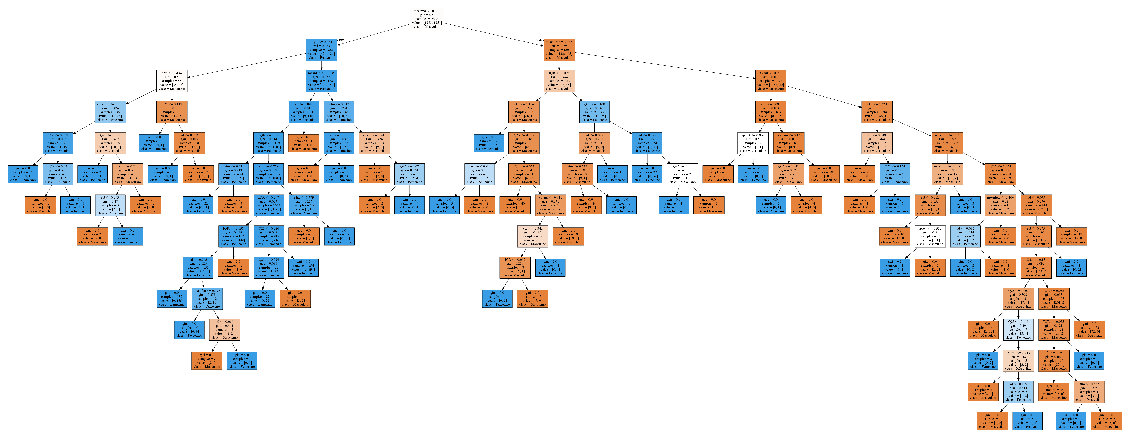

In [50]:
datos_plotear = export_graphviz(instancia_arbol3, out_file=None,class_names=["Masculino", "Femenino"],
                feature_names=list(X.columns.values), filled=True)
grafico = graphviz.Source(datos_plotear) 
plt.rcParams['figure.figsize'] = [20, 20] # Tamaño del gráfico
graficar_arbol(grafico)

In [51]:
##Podar
instancia_arbol2 = DecisionTreeClassifier(min_samples_leaf=150)
instancia_arbol2.fit(X_train,y_train)
prediccion = instancia_arbol2.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[283  18]
 [ 17 316]]

Precisión Global:
0.944794952681388

Error Global:
0.05520504731861198

Precisión por categoría:
   Femenino  Masculino
0  0.940199   0.948949

Precision Positiva (PP):
0.948948948948949

Precision Negativa (PN):
0.9401993355481728

Falsos Positivos(FP):
0.05980066445182719

Falsos Negativos (FN):
0.05105105105105101

Asertividad Positiva (AP):
0.9461077844311377

Asertividad Negativa (NP):
0.9433333333333334


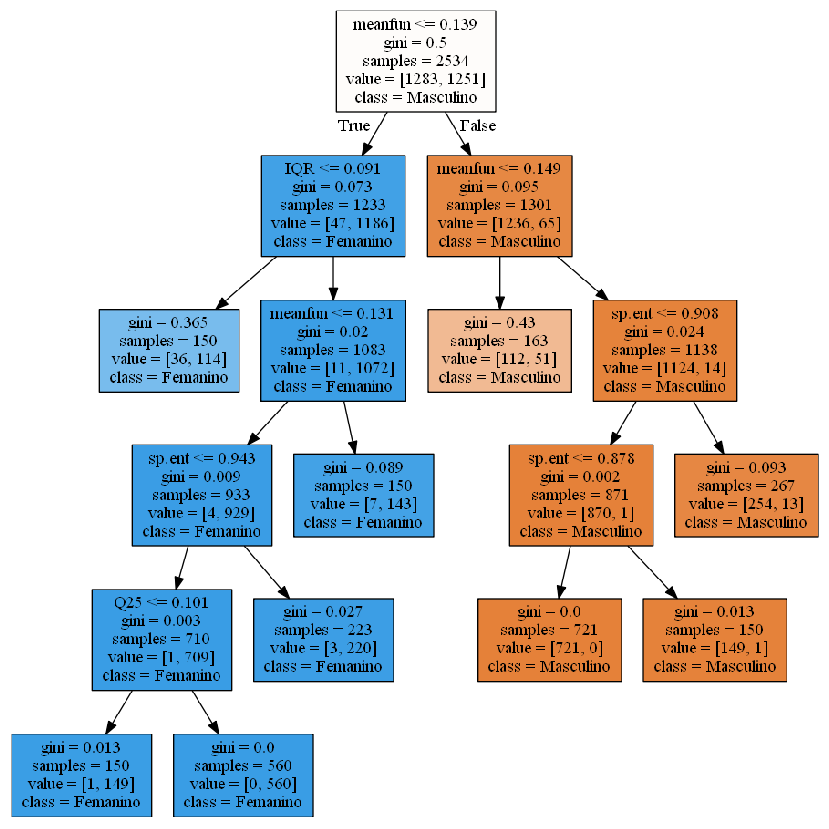

In [52]:
datos_plotear = export_graphviz(instancia_arbol2, out_file=None,class_names=["Masculino", "Femanino"],
                feature_names=list(X.columns.values), filled=True)
grafico = graphviz.Source(datos_plotear) 
plt.rcParams['figure.figsize'] = [15, 15] # Tamaño del gráfico
graficar_arbol(grafico)

Con una precision global de 0.0.9668769716088328 para el arbol completo con las 6 variables es mayor que el modelo con todas las variables, la precision es bastante alta con menos de un 0,05 de error. Eso si visualmente, se denota que el modelo presenta muchos datos confundidos, pero aun asi se denota que la precision por categoria tanto para femenino como masculino es bastante alta. El modelo en terminos generales funciona bien con los datos. El arbol de decision inicial resulta muy grande, y de hecho, por tal motivo, dificil de interpretar. Por tal motivo se procede a podarlo y reducirlo. Leyendo el arbol de decision anterior, se denota lo siguiente. El modelo identifica inicialmente la variable meanfun de nuevo, cuando esta es menor o igual de 0,139, se mantiene un coeficiente de gini de 0,5 es decir medio, el cuadro inicial identifica 2534 muestras para este caso donde 1283 parecen ser atribuibles a masculino y 1251 a femenino. Volviendo al tema cuando meanfun es menor o igual de 0,139, entonces "True", indica que nos movemos al cuadro de abajo azul representado principalmente por voces femeninas. Donde la muestra que recibe e identifica es de 1233, que se va a dividir segun el criterio de un IQR menor o igual de 0,091, es decir se divide a las feminas segun este rango intercuartil, 47 cumplen con este criterio vs 1186 que no lo hacen. Esto indica que existen no tantos datos confundidos, de hecho, el gini es de casi 0 con un 0,073. Si pasamos de cuadro a la seccion anaranjada en el mismo nivel tenemos casos identificados como masculinos con un sample de 1301 casos. Ahora para bajar al siguiente nivel meanfun se muestra como variable identifacdora donde los casos True son menores o iguales a 0,149 y los Falsos por encima. los menores, es decir, true son 1236 casos contra 65 false. El gini es nuevamente bajo con 0,095 lo que indica pocos datos confundidos, aunque aun se puede bajar a cero.

In [53]:
###Ahora con otras combinaciones de parametros
instancia_arbol = DecisionTreeClassifier(criterion='entropy',max_depth=2)
instancia_arbol.fit(X_train,y_train)
print("Las predicciones en Testing son: {}".format(instancia_arbol.predict(X_test)))

Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'

In [54]:
prediccion = instancia_arbol.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[283  18]
 [ 17 316]]

Precisión Global:
0.944794952681388

Error Global:
0.05520504731861198

Precisión por categoría:
   Femenino  Masculino
0  0.940199   0.948949

Precision Positiva (PP):
0.948948948948949

Precision Negativa (PN):
0.9401993355481728

Falsos Positivos(FP):
0.05980066445182719

Falsos Negativos (FN):
0.05105105105105101

Asertividad Positiva (AP):
0.9461077844311377

Asertividad Negativa (NP):
0.9433333333333334


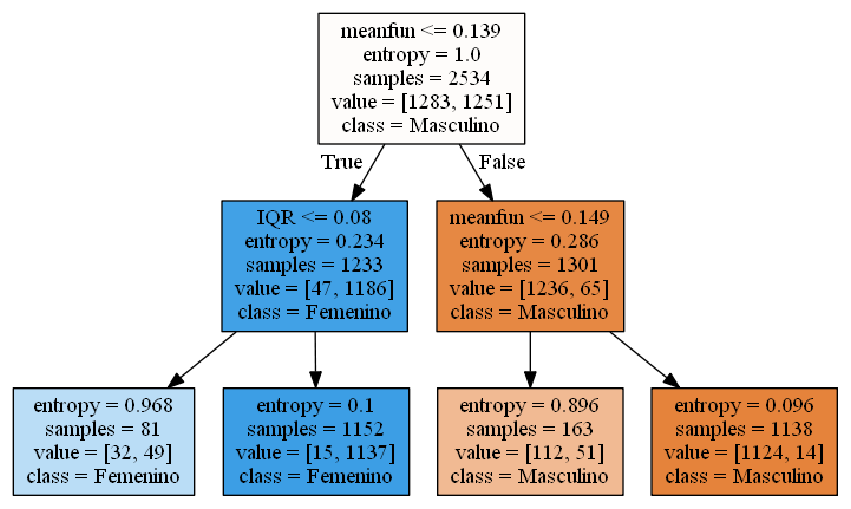

In [55]:
datos_plotear = export_graphviz(instancia_arbol, out_file=None,class_names=["Masculino", "Femenino"],
                feature_names=list(X.columns.values), filled=True)
grafico = graphviz.Source(datos_plotear) 
plt.rcParams['figure.figsize'] = [15, 15] # Tamaño del gráfico
graficar_arbol(grafico) 

Aqui resulta importante notar que se limito el arbol de decision inicial con parametros distintos, en este caso, criterion='entropy' y max_depth=2, solo con 6 variables, en general estos generan algoritmos distintos de estimacion pero la diferencia no debe ser mucho mayor al caso anterior. De hecho, la precision global dio similar al arbol podado 0.944794952681388. Los resultados de este arbol de decision con parametros nuevos son buenos, aunque ligeramente menos precisos que el arbol inicial. No se necesita podarlo porque se establecio un depth maximo de 2. Leyendo el arbol de decision anterior, los criterios son los mismos pero con ligeras variaciones en las estimaciones. En vez de gini ahora tenemos entropy. El modelo identifica inicialmente la variable meanfun, cuando esta es menor o igual de 0,139, se mantiene un coeficiente de entropy de 1,0 es decir medio para ambas categorias, el cuadro inicial identifica 2534 muestras para este caso donde 1283 parecen ser atribuibles a masculino y 1251 a femenino. Volviendo al tema cuando meanfun es menor o igual de 0,139, entonces "True", indica que nos movemos al cuadro de abajo azul representado principalmente por voces femeninas. Donde la muestra que recibe e identifica es de 1233, que se va a dividir segun el criterio de un IQR menor o igual de 0,08, es decir se divide a las feminas segun este rango intercuartil, 47 cumplen con este criterio vs 1186 que no lo hacen. Esto indica que existen no tantos datos confundidos, de hecho, el entropy es de 0,234. Si pasamos de cuadro a la seccion anaranjada en el mismo nivel tenemos casos identificados como masculinos con un sample de 1301 casos. Ahora para bajar al siguiente nivel meanfun se muestra como variable identifacdora donde los casos True son menores o iguales a 0,149 y los Falsos por encima. los menores, es decir, true son 1236 casos contra 65 false. El entropy es nuevamente bajo con 0,286 lo que indica pocos datos confundidos, aunque aun se puede bajar a cero.

In [56]:
##max depth = 2 y criteration=entropy y splitter=random
instancia_arbol = DecisionTreeClassifier(criterion='gini', splitter="random", max_depth=3)
instancia_arbol.fit(X_train,y_train)
print("Las predicciones en Testing son: {}".format(instancia_arbol.predict(X_test)))

Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Feme

In [57]:
prediccion = instancia_arbol.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[252  49]
 [  4 329]]

Precisión Global:
0.916403785488959

Error Global:
0.08359621451104104

Precisión por categoría:
   Femenino  Masculino
0  0.837209   0.987988

Precision Positiva (PP):
0.987987987987988

Precision Negativa (PN):
0.8372093023255814

Falsos Positivos(FP):
0.16279069767441856

Falsos Negativos (FN):
0.012012012012011963

Asertividad Positiva (AP):
0.8703703703703703

Asertividad Negativa (NP):
0.984375


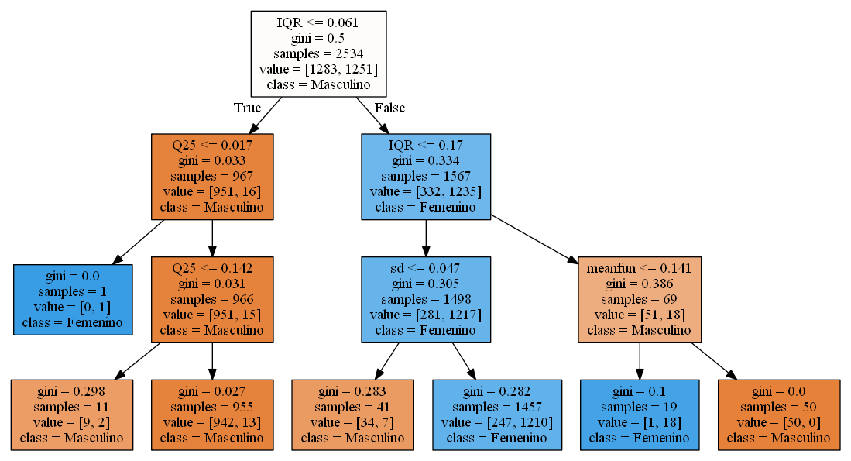

In [58]:
datos_plotear = export_graphviz(instancia_arbol, out_file=None,class_names=["Masculino", "Femenino"],
                feature_names=list(X.columns.values), filled=True)
grafico = graphviz.Source(datos_plotear) 
plt.rcParams['figure.figsize'] = [15, 15] # Tamaño del gráfico
graficar_arbol(grafico) 

Aqui se denota la mayor diferencia resulta importante igual que cuando se tomo en consideracion todas las variables, en este caso, criterion='gini' y max_depth=3, pero se incluye un splitter random que bajo significativamente la precision. De hecho, la precision global puede decirse que ya muestra un resultado significativamente inferior con 0.916403785488959. Los resultados de este arbol de decision con parametros nuevos aun se puede decir que son buenos y aun altos, aunque menos precisos que el arbol inicial. No se necesita podarlo porque se establecio un depth maximo de 3. El modelo identifica inicialmente la variable IQR, cuando esta es menor o igual de 0,061, se mantiene un coeficiente de gini en 0,5, es decir, medio para ambas categorias, el cuadro inicial identifica 2534 muestras para este caso donde 1283 parecen ser atribuibles a masculino y 1251 a femenino. Volviendo al tema cuando IQR es menor o igual de 0,061, entonces "True", indica que nos movemos al cuadro de abajo anaranjado representado principalmente por voces masculinas. Donde la muestra que recibe e identifica es de 967, que se va a dividir segun el criterio de un IQR menor o igual de 0,017, es decir se segun este rango intercuartil, 951 cumplen con este criterio vs 16 que no lo hacen. Esto indica que existen no tantos datos confundidos, de hecho, el gini es de 0,033. Si pasamos de cuadro a la seccion azul en el mismo nivel tenemos casos identificados como femeninos con un sample de 1567 casos. Ahora para bajar al siguiente nivel IQR se muestra como variable identifacdora donde los casos True son menores o iguales a 0,17 y los Falsos por encima. los menores, es decir, true son 332 casos contra 1235 false. El gini es nuevamente bajo con 0,334 lo que indica pocos datos confundidos, aunque aun se puede bajar a cero.

In [59]:
A = np.matrix([[0.7413249211356467, 0.25867507886435326, 0.7717717717717718, 0.707641196013289, 0.292358803986711, 0.2282282282282282, 0.744927536231884, 0.7370242214532872],
               [0.9794952681388013, 0.02050473186119872, 0.975975975975976, 0.9833887043189369, 0.01661129568106312, 0.024024024024024038, 0.9848484848484849, 0.9736842105263158],
              [0.9605678233438486, 0.039432176656151396, 0.963963963963964, 0.9568106312292359, 0.04318936877076407, 0.036036036036036, 0.9610778443113772, 0.96],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.9006309148264984, 0.09936908517350163, 0.9519519519519519, 0.8438538205980066, 0.15614617940199338, 0.048048048048048075, 0.8708791208791209, 0.9407407407407408],
              [0.9668769716088328, 0.03312302839116721, 0.960960960960961, 0.973421926910299, 0.02657807308970095, 0.03903903903903905, 0.975609756097561, 0.9575163398692811],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.916403785488959, 0.08359621451104104, 0.987987987987988, 0.8372093023255814, 0.16279069767441856, 0.012012012012011963, 0.8703703703703703, 0.984375]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos todas variables","K-vecinos 6 variables","Arbol de Decision (default)","Arbol de Decision (criterion='entropy',max_depth=2)","Arbol de Decision (criterion='gini', splitter='random', max_depth=3)","Arbol de Decision 6 predictoras (default)","Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)","Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df

,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos todas variables,0.741325,0.258675,0.771772,0.707641,0.292359,0.228228,0.744928,0.737024
K-vecinos 6 variables,0.979495,0.020505,0.975976,0.983389,0.016611,0.024024,0.984848,0.973684
Arbol de Decision (default),0.960568,0.039432,0.963964,0.956811,0.043189,0.036036,0.961078,0.960000
"Arbol de Decision (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision (criterion='gini', splitter='random', max_depth=3)",0.900631,0.099369,0.951952,0.843854,0.156146,0.048048,0.870879,0.940741
Arbol de Decision 6 predictoras (default),0.966877,0.033123,0.960961,0.973422,0.026578,0.039039,0.975610,0.957516
"Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)",0.916404,0.083596,0.987988,0.837209,0.162791,0.012012,0.870370,0.984375


Para estos datos se denota aun que todos los metodos de Arbol de decision se muestran precisos, especialmente el caso default y con las 6 variables predictoras, pero como se denota, el modelo de 6 variables k vecinos resulta mejor. Su precision global es mas alta, es decir, logra identificar mejor los casos la PP y PN confirman esto, ademas los datos confundidas FP y FN son menores. Resulta importante notar que los modelos que mejor estiman son los definidos por las 6 variables predictoras que parecen tener visualmente el mayor poder predictivo.

Ejercicio 3: [25 puntos] Esta pregunta utiliza los datos (tumores.csv). Se trata de un conjunto de datos de caracter´ısticas del tumor cerebral que incluye cinco variables de primer orden y ocho de textura y cuatro par´ametros de evaluaci´on de la calidad con el nivel objetivo. La variables son: Media, Varianza, Desviaci´on est´andar, Asimetr´ıa, Kurtosis, Contraste, Energ´ıa, ASM (segundo momento angular), Entrop´ıa, Homogeneidad, Disimilitud, Correlaci´on, Grosor,   PSNR (Pico de la relaci´on se˜nal-ruido), SSIM (´Indice de Similitud Estructurada), MSE (Mean Square Error), DC (Coeficiente de Dados) y la variable a predecir tipo (1 = Tumor, 0 = No-Tumor).
Realice lo siguiente:

1. Use el m´etodo de Arboles de Decisi´on en ´ Python para generar un modelo predictivo para la tabla tumores.csv usando el 70 % de los datos para la tabla aprendizaje y un 30 % para la tabla testing.

In [60]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/Documents/Machine Learning/Métodos Supervisados con Python/Clase 01")
print(os.getcwd())
datos = pd.read_csv('tumores.csv',delimiter=',',decimal=".")
datos['imagen'] = datos['imagen'].astype('category')
print(datos.shape)
print(datos.head())
print(datos.info())

C:\Users\rzamoram\Documents\Machine Learning\Métodos Supervisados con Python\Clase 01
(1275, 18)
   imagen      media     varianza  desviacion.estandar  entropia  asimetria  \
0  Image1  23.448517  2538.985627            50.388348  0.651174   1.984202   
1  Image2   4.398331   834.853030            28.893823  0.953532   6.495203   
2  Image3   3.244263   642.059166            25.338886  0.966065   7.772860   
3  Image4   8.511353  1126.214187            33.559115  0.868765   3.763142   
4  Image5  21.000793  2235.316978            47.279139  0.684724   1.936029   

    kurtosis   contraste   energia       asm  homogeneidad  disiminitud  \
0   5.421042  181.467713  0.781557  0.610831      0.847033     2.765411   
1  43.349355   76.745886  0.972770  0.946281      0.980762     0.548605   
2  61.756034   81.752406  0.980161  0.960715      0.985066     0.540411   
3  15.107579  362.291213  0.921786  0.849690      0.949295     2.765725   
4   4.722343  312.439226  0.804184  0.646711      0.8

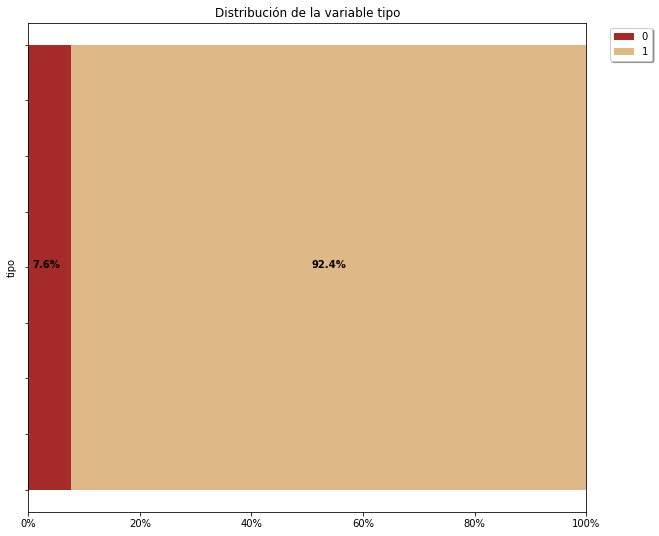

In [61]:
distribucion_variable_predecir(datos,"tipo")

In [62]:
X = datos.iloc[:,1:17] 
print(X.head())
y = datos.iloc[:,17:18] 
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

       media     varianza  desviacion.estandar  entropia  asimetria  \
0  23.448517  2538.985627            50.388348  0.651174   1.984202   
1   4.398331   834.853030            28.893823  0.953532   6.495203   
2   3.244263   642.059166            25.338886  0.966065   7.772860   
3   8.511353  1126.214187            33.559115  0.868765   3.763142   
4  21.000793  2235.316978            47.279139  0.684724   1.936029   

    kurtosis   contraste   energia       asm  homogeneidad  disiminitud  \
0   5.421042  181.467713  0.781557  0.610831      0.847033     2.765411   
1  43.349355   76.745886  0.972770  0.946281      0.980762     0.548605   
2  61.756034   81.752406  0.980161  0.960715      0.985066     0.540411   
3  15.107579  362.291213  0.921786  0.849690      0.949295     2.765725   
4   4.722343  312.439226  0.804184  0.646711      0.880301     3.006660   

   correlacion        psnr      ssim       mse        dc  
0     0.968576   97.974630  0.777011  0.171163  0.303989  
1   

In [63]:
instancia_arbol = DecisionTreeClassifier(random_state=0)

instancia_arbol.fit(X_train,y_train)

print("Las predicciones en Testing son: {}".format(instancia_arbol.predict(X_test)))

Las predicciones en Testing son: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [64]:
prediccion = instancia_arbol.predict(X_test)
MC = confusion_matrix(y_test, prediccion)    
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 30   3]
 [  3 347]]

Precisión Global:
0.9843342036553525

Error Global:
0.015665796344647487

Precisión por categoría:
          0         1
0  0.909091  0.991429

Precision Positiva (PP):
0.9914285714285714

Precision Negativa (PN):
0.9090909090909091

Falsos Positivos(FP):
0.09090909090909094

Falsos Negativos (FN):
0.008571428571428563

Asertividad Positiva (AP):
0.9914285714285714

Asertividad Negativa (NP):
0.9090909090909091


2. Usando la funci´on programada en el ejercicio 1 de la tarea anterior, los datos tumores.csv y los modelos generados arriba construya un DataFrame de manera que en cada una de las filas aparezca un modelo predictivo y en las columnas aparezcan los ´ındices Precisi´on Global, Error Global Precisi´on Positiva (PP), Precisi´on Negativa (PN), Falsos Positivos (FP), los Falsos Negativos (FN), la Asertividad Positiva (AP) y la Asertividad Negativa (AN). ¿Cu´al de los modelos es mejor para estos datos?

In [65]:
A = np.matrix([[0.8981723237597912, 0.10182767624020883, 0.9742857142857143, 0.09090909090909091, 0.9090909090909091, 0.02571428571428569, 0.9191374663072777, 0.25],
               [0.9843342036553525, 0.015665796344647487, 0.9914285714285714, 0.9090909090909091, 0.09090909090909094, 0.008571428571428563, 0.9914285714285714, 0.9090909090909091]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos", "Arbol de Decision"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df

,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos,0.898172,0.101828,0.974286,0.090909,0.909091,0.025714,0.919137,0.250000
Arbol de Decision,0.984334,0.015666,0.991429,0.909091,0.090909,0.008571,0.991429,0.909091


De la tarea pasada de k-vecinos se debe notar que los 4 algoritmos generaron el mismo resultado, por lo que se toma como un resultado default para evitar confusion de interpretacion. La precision global fue de 0.8981723237597912 y la precision global por categoria fue de 0.090909 para el caso de No tumor y 0.974286 para el caso de Si tumor. En el caso de bayes para este ejercicio funciona mucho mejor con una precision global de 0.9843342036553525 y por categoria de 0.909091 y 0.991429 es decir, identifica mejor los casos con ciertos errores de datos confundidos.

3. Grafique el ´arbol generado e interprete al menos dos reglas que se puedan extraer del mismo. Si es necesario pode el ´arbol para que las reglas sean legibles.

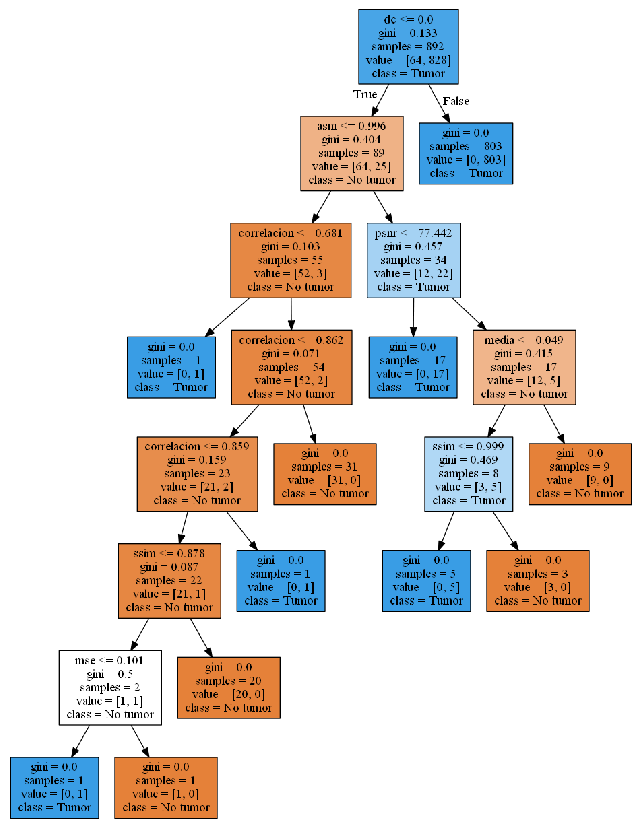

In [66]:
datos_plotear = export_graphviz(instancia_arbol, out_file=None,class_names=["No tumor", "Tumor"],
                feature_names=list(X.columns.values), filled=True)
grafico = graphviz.Source(datos_plotear) 
plt.rcParams['figure.figsize'] = [15, 15] # Tamaño del gráfico
graficar_arbol(grafico)  

Este arbol de decision no resulta tan amplio por lo que puede pero no es necesario podarlo. Leyendo el arbol de decision anterior, se denota lo siguiente. El modelo identifica inicialmente la variable dc, resulta curioso ya cuando esta es menor o igual de 0, es decir es 0, se mantiene un coeficiente de gini de 0,133, lo importante bajando un nivel es que los casos false en el cuadro azul todos son . Volviendo al tema cuando meanfun es menor o igual de 0,139, entonces "True", indica que todos los dc=0 son casos de tumor, es decir, en los 803 casos fue un si tumor y por ello gini 0. Si pasamos de cuadro a la seccion anaranjada en el mismo nivel tenemos casos identificados como No tumor con un sample de 89 casos cuando la variable asim es menor o igual a 0,996. True son 64 casos y 25 false, con un gini por tal motivo de 0,404. 

Pregunta 4: [25 puntos] En este ejercicio vamos a predecir n´umeros escritos a mano (Hand Written Digit Recognition), la tabla de aprendizaje est´a en el archivo ZipDataTrainCod.csv y la tabla de testing est´a en el archivo ZipDataTestCod.csv. En la figura siguiente se ilustran los datos:

1. Usando Arboles de Decisi´on m´as cercanos un modelo predictivo para la tabla de aprendizaje.

In [67]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/Documents/Machine Learning/Métodos Supervisados con Python/Clase 01")
print(os.getcwd())
datos = pd.read_csv('ZipDataTrainCod.csv',delimiter=';',decimal=".")
datos2 = pd.read_csv('ZipDataTestCod.csv',delimiter=';',decimal=".")

C:\Users\rzamoram\Documents\Machine Learning\Métodos Supervisados con Python\Clase 01


In [68]:
print(datos.shape)
print(datos.head())
print(datos.info())

print(datos2.shape)
print(datos2.head())
print(datos2.info())

(7291, 257)
   Numero   V2   V3   V4     V5     V6     V7     V8     V9    V10  ...  \
0    seis -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...   
1   cinco -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ...   
2  cuatro -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ...   
3   siete -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...   
4    tres -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...   

    V248   V249   V250   V251   V252   V253   V254   V255   V256  V257  
0  0.304  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000  -1.0  
1 -0.671 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828  -1.0  
2 -1.000 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000  -1.0  
3 -0.318  1.000  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000  -1.0  
4  0.466  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000  -1.0  

[5 rows x 257 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
C

In [69]:
X = datos.iloc[:,1:] 
print(X.head())
y = datos.iloc[:,0:1] 
print(y.head())

X2 = datos2.iloc[:,1:] 
print(X.head())
y2 = datos2.iloc[:,0:1] 
print(y.head())

    V2   V3   V4     V5     V6     V7     V8     V9    V10    V11  ...   V248  \
0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 -0.167  ...  0.304   
1 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 -1.000  ... -0.671   
2 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.996  ... -1.000   
3 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450 -0.067  ... -0.318   
4 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  0.234  ...  0.466   

    V249   V250   V251   V252   V253   V254   V255   V256  V257  
0  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000  -1.0  
1 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828  -1.0  
2 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000  -1.0  
3  1.000  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000  -1.0  
4  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000  -1.0  

[5 rows x 256 columns]
   Numero
0    seis
1   cinco
2  cuatro
3   siete
4    tres
    V2   V3   V4     V5     V6   

In [70]:
instancia_arbol = DecisionTreeClassifier(random_state=0)
instancia_arbol.fit(X,y)
print("Las predicciones en Testing son: {}".format(instancia_arbol.predict(X2)))

Las predicciones en Testing son: ['nueve' 'seis' 'tres' ... 'cuatro' 'cero' 'uno']


2. Con la tabla de testing calcule la matriz de confusi´on, la precisi´on global, el error global y la precisi´on en cada unos de los d´ıgitos. ¿Son buenos los resultados? Adem´as compare respecto a los resultados obtenidos en la tarea anterior. 

In [71]:
def indices_general_reducido(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por categoría":precision_categoria}

In [72]:
prediccion = instancia_arbol.predict(X2)
MC = confusion_matrix(y2, prediccion)
indices = indices_general_reducido(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[330   8   5   7   0   4   2   1   2   0]
 [  8 117   6   3   3   4   0   2  17   0]
 [  5   4 157   6  13   4   4   2   1   4]
 [  7   1   6 155   2  12   5   3   6   1]
 [  2   2  11   3 141   7   0   5   3   3]
 [  6   4   7   9   8 114   7   3   7   1]
 [  3   3   4   8   0   1 145   0   4   2]
 [  0   0   5   1   5   0   2 128   3   3]
 [  5  18   1   6   4   4   2   0 125   1]
 [  0   0   6   1   1   7   3   1   0 245]]

Precisión Global:
0.8256103637269556

Error Global:
0.17438963627304438

Precisión por categoría:
      cero    cinco  cuatro       dos    nueve      ocho      seis     siete  \
0  0.91922  0.73125   0.785  0.782828  0.79661  0.686747  0.852941  0.870748   

       tres      uno  
0  0.753012  0.92803  


Los resultados no resultan tan buenos como en la tarea anterior, con arboles de decision se tiene una precision global de 0.8256103637269556, con precision por categoria menores que en k-vecinos aqui el minimo es el de ocho con 0.686747. En el caso de k-vecinos los resultados presentan una precision global de 0.9441953163926258 se denota alta aunque viendo el proposito del modelo orientado a codigos postales para determinar a dando, en ambos modelos, seran enviadas si debe tenerse en cuenta que podria ser un gran numero de sobres los que se enviarian a destinos erroneos. 

3. Repita los ejercicios 1, 2 y 3 pero usando solamente los 3s, 5s y los 8s. ¿Mejora la predicci´on?

In [73]:
Numero = ['cero','uno', 'dos','cuatro','seis', 'siete','nueve']
datostrain358 = datos[~datos.Numero.isin(Numero)]
datostrain358.shape
datostrain358.head()
datostrain358.info()


Numero = ['cero','uno', 'dos','cuatro','seis', 'siete','nueve']
datostest358 = datos2[~datos2.Numero.isin(Numero)]
datostest358.shape
datostest358.head()
datostest358.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756 entries, 1 to 7288
Columns: 257 entries, Numero to V257
dtypes: float64(256), object(1)
memory usage: 3.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 2 to 2002
Columns: 257 entries, Numero to V257
dtypes: float64(256), object(1)
memory usage: 991.7+ KB


In [74]:
X = datostrain358.iloc[:,1:] 
print(X.head())
y = datostrain358.iloc[:,0:1] 
print(y.head())

X2 = datostest358.iloc[:,1:] 
print(X.head())
y2 = datostest358.iloc[:,0:1] 
print(y.head())

     V2   V3   V4     V5     V6     V7     V8     V9    V10    V11  ...  \
1  -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 -1.000  ...   
4  -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  0.234  ...   
6  -1.0 -1.0 -1.0 -0.830  0.442  1.000  1.000  0.479 -0.328 -0.947  ...   
17 -1.0 -1.0 -1.0 -1.000 -1.000 -0.992 -0.385 -0.143  0.462  1.000  ...   
21 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -0.988  0.646  0.757 -0.220  ...   

     V248   V249   V250   V251   V252   V253   V254   V255   V256  V257  
1  -0.671 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828  -1.0  
4   0.466  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000  -1.0  
6   1.000  0.671  0.345 -0.507 -1.000 -1.000 -1.000 -1.000 -1.000  -1.0  
17 -0.288  0.286  0.988  0.988  0.267 -0.325 -0.962 -1.000 -1.000  -1.0  
21 -1.000 -0.544  0.321  1.000 -0.405 -1.000 -1.000 -1.000 -1.000  -1.0  

[5 rows x 256 columns]
   Numero
1   cinco
4    tres
6    tres
17   ocho
21   ocho
     V2   V3   V4    

In [75]:
instancia_arbol = DecisionTreeClassifier(random_state=0)
instancia_arbol.fit(X,y)
print("Las predicciones en Testing son: {}".format(instancia_arbol.predict(X2)))

Las predicciones en Testing son: ['tres' 'tres' 'cinco' 'tres' 'tres' 'cinco' 'cinco' 'ocho' 'ocho' 'cinco'
 'cinco' 'ocho' 'tres' 'ocho' 'ocho' 'tres' 'ocho' 'tres' 'tres' 'cinco'
 'tres' 'cinco' 'cinco' 'ocho' 'cinco' 'cinco' 'ocho' 'cinco' 'tres'
 'cinco' 'ocho' 'tres' 'tres' 'ocho' 'cinco' 'ocho' 'tres' 'ocho' 'cinco'
 'ocho' 'ocho' 'ocho' 'tres' 'ocho' 'tres' 'ocho' 'tres' 'cinco' 'cinco'
 'cinco' 'ocho' 'ocho' 'ocho' 'tres' 'ocho' 'tres' 'ocho' 'tres' 'tres'
 'tres' 'tres' 'cinco' 'ocho' 'tres' 'ocho' 'ocho' 'cinco' 'cinco' 'tres'
 'ocho' 'cinco' 'ocho' 'tres' 'tres' 'cinco' 'ocho' 'tres' 'cinco' 'ocho'
 'tres' 'cinco' 'tres' 'tres' 'ocho' 'tres' 'ocho' 'ocho' 'ocho' 'tres'
 'cinco' 'ocho' 'ocho' 'cinco' 'ocho' 'ocho' 'ocho' 'cinco' 'ocho' 'cinco'
 'cinco' 'ocho' 'cinco' 'cinco' 'tres' 'tres' 'ocho' 'ocho' 'ocho' 'ocho'
 'cinco' 'tres' 'tres' 'cinco' 'ocho' 'ocho' 'tres' 'cinco' 'tres' 'ocho'
 'ocho' 'tres' 'cinco' 'tres' 'cinco' 'cinco' 'tres' 'tres' 'cinco' 'ocho'
 'ocho' 'tres

In [76]:
prediccion = instancia_arbol.predict(X2)
MC = confusion_matrix(y2, prediccion)
indices = indices_general_reducido(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[135  13  12]
 [ 10 140  16]
 [ 25  11 130]]

Precisión Global:
0.823170731707317

Error Global:
0.17682926829268297

Precisión por categoría:
     cinco      ocho      tres
0  0.84375  0.843373  0.783133


Con estos tres numeros la precision global de hecho disminuye un par de decimas a 0.823170731707317, aunque a nivel de precision por categoria estos digitos mejoran. Los resultados no resultan tan buenos como en la tarea anterior de la misma forma que con todos los digitos.